This notebook shows the Instrument Response can be considered as almost flat within the interested frequency range of, i.e. [12, 32] HZ.

In [13]:
from obspy import read, UTCDateTime,read_inventory
from matplotlib import pyplot as plt
RESP_DIR = '/network/projects/aia/whale_call/RESP'

In [14]:
data_path='/network/projects/aia/whale_call/RAW/'
station_name = 'PMAQ'
channel = 'HHZ'
inv = read_inventory(RESP_DIR+"/"+"/RESP.CN.%s..%s"%(station_name,channel),format='RESP')
center_time = UTCDateTime("20200902015300")
detection_win_len = 120 # lenth of detection window in s
data_year = center_time.year
data_month = center_time.month
data_day = center_time.day
start_time = center_time - detection_win_len/2
end_time = center_time + detection_win_len/2

date_string = '%s%02d%02d'%(data_year,data_month,data_day)
file_patterns = data_path+date_string+'/'+ '%s.%02d.%02d.CN'%(data_year,data_month,data_day)+'*'+station_name+'*Z*.SAC'

st = read(data_path+date_string+"/"+'%s.%02d.%02d.CN'%(data_year,data_month,data_day)+".%s..%s.SAC"%(station_name,channel),
     starttime=start_time,endtime=end_time)
tr = st[0]


### Perform bandpass

In [15]:
freq_min = 12
freq_max = 32
tr.filter('bandpass', freqmin=freq_min, freqmax=freq_max,zerophase=True)


CN.PMAQ..HHZ | 2020-09-02T01:52:00.000000Z - 2020-09-02T01:54:00.000000Z | 100.0 Hz, 12001 samples

### Remove IR and Visualize IR curve

CN.PMAQ..HHZ | 2020-09-02T01:52:00.000000Z - 2020-09-02T01:54:00.000000Z | 100.0 Hz, 12001 samples

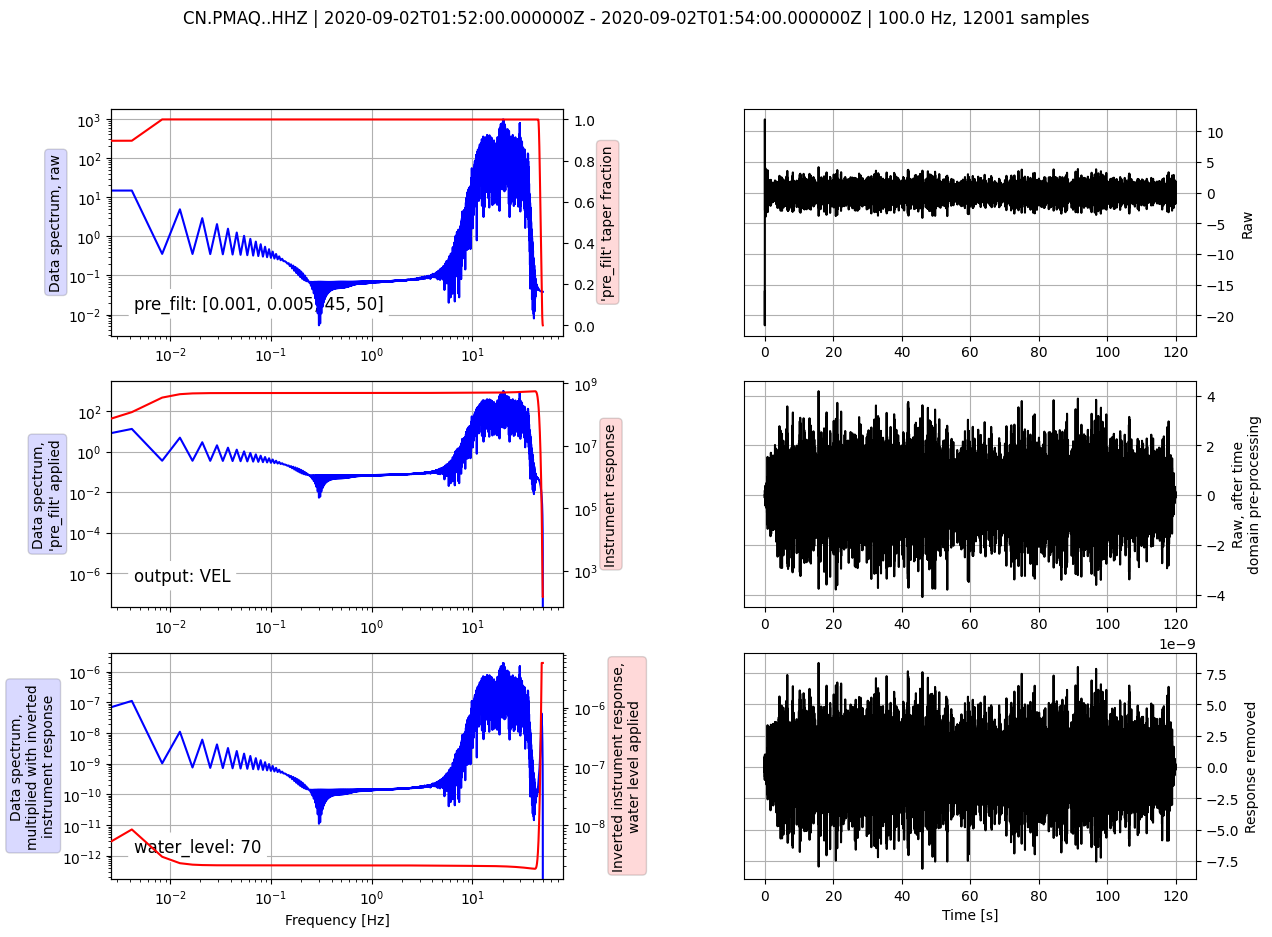

In [16]:
tr_ir_removed = tr.copy()
pre_filt = [0.001, 0.005, 45, 50]
tr_ir_removed.remove_response(inventory=inv, pre_filt=pre_filt, output="VEL",
                   water_level=70, plot=True) 


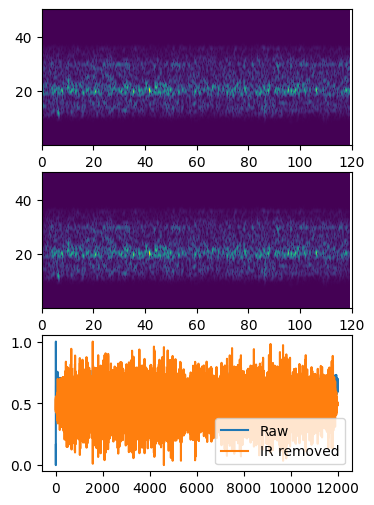

In [17]:
fig,axs=plt.subplots(3,1,figsize=(4,6))
tr.spectrogram(axes=axs[0])
tr_ir_removed.spectrogram(axes=axs[1])
tr.data = (tr.data-tr.data.min())/(tr.data.max()-tr.data.min())
tr_ir_removed.data = (tr_ir_removed.data-tr_ir_removed.data.min())/(tr_ir_removed.data.max()-tr_ir_removed.data.min())
axs[2].plot(tr.data,label='Raw')
axs[2].plot(tr_ir_removed.data,label='IR removed')
axs[2].legend()